## EDA
### 1- Importing libraries & data

In [58]:
import pandas as pd
import openpyxl # Manipulate excel files 
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # config :to control the behavior of pandas when 
                                           # it encounters warnings related to chained assignments.
import warnings

In [59]:
delay_df = pd.read_excel('data/get_around_delay_analysis.xlsx',sheet_name='rentals_data') # first sheet
doc =  pd.read_excel('data/get_around_delay_analysis.xlsx',sheet_name='Documentation')# second sheet 
pricing_df = pd.read_csv('data/get_around_pricing_project.csv')

### 2- Pricing

In [60]:
pricing_df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [61]:
pricing_df.drop('Unnamed: 0',axis=1,inplace=True) # useless column from pricing  file
pricing_df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [62]:
# Stats
pricing_df.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


* The pricing dataframe is clean, with no missing data. However, there are some anomalies such as a negative minimum mileage and a 
  maximum of 1000376 !!! .
* These indicate the presence of outliers and inconsistent values.

In [63]:
# Filtering out data points that deviate by 3 standard deviations from the mean for both mileage and daily rental price.

prep = pricing_df.loc[pricing_df['mileage'] < pricing_df['mileage'].mean() + pricing_df['mileage'].std()*3]
prep = prep.loc[prep['mileage'] > pricing_df['mileage'].mean() - pricing_df['mileage'].std()*3]
prep = prep.loc[prep['rental_price_per_day'] < prep['rental_price_per_day'].mean() + prep['rental_price_per_day'].std()*3]
prep = prep.loc[prep['rental_price_per_day'] > prep['rental_price_per_day'].mean() - prep['rental_price_per_day'].std()*3]
prep = prep.loc[prep['engine_power'] > prep['engine_power'].mean() - prep['engine_power'].std()*3]
pricing_df_clean = prep.loc[prep['engine_power'] < prep['engine_power'].mean() + prep['engine_power'].std()*3]

In [64]:
pricing_df_clean.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4670,4670.000000,4670.000000,4670,4670,4670,4670,4670,4670,4670,4670,4670,4670,4670.000000
unique,26,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,935,NaN,NaN,4496,1575,1561,2563,3733,3741,3758,2489,3545,4366,NaN
mean,NaN,139374.360171,127.128266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.195717
std,NaN,54298.503227,35.127770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.761146
min,NaN,476.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000
25%,NaN,103330.250000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,140866.500000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,174771.500000,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [65]:
print(f" After removing outliers, our new dataframe has {round(len(pricing_df_clean)/len(pricing_df)*100,2)}% of previous data")

 After removing outliers, our new dataframe has 96.43% of previous data


#### Plotting how much money rentals actually bring in, per car brand

In [66]:

models_df = pricing_df_clean.groupby('model_key')['rental_price_per_day'].sum().reset_index().sort_values(by='rental_price_per_day', ascending=False)

fig = px.bar(models_df, x='model_key',
             y='rental_price_per_day', 
             color='rental_price_per_day',
             labels={'rental_price_per_day': 'Rental Price per Day'},
             title='Total Rental Price per Day by Model',
             template='plotly', width=900, height=500)


fig.update_layout(xaxis=dict(tickangle=40))
fig.show()

* The top 5 brands (Renault, Citroën, BMW, Audi, and Peugeot) are positioned on the more affordable side;  
  however, they play a significantly more crucial role for the business, contributing to over 75% of the total 
  income derived from rentals.

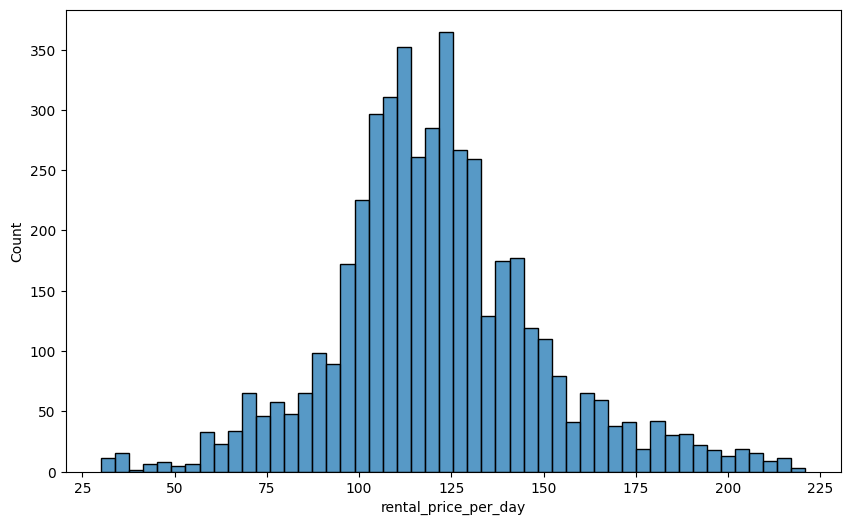

In [67]:
plt.figure(figsize=(10,6))
sns.histplot(pricing_df_clean['rental_price_per_day'])
plt.show()

Most rentals cost between 100 and 150 per day

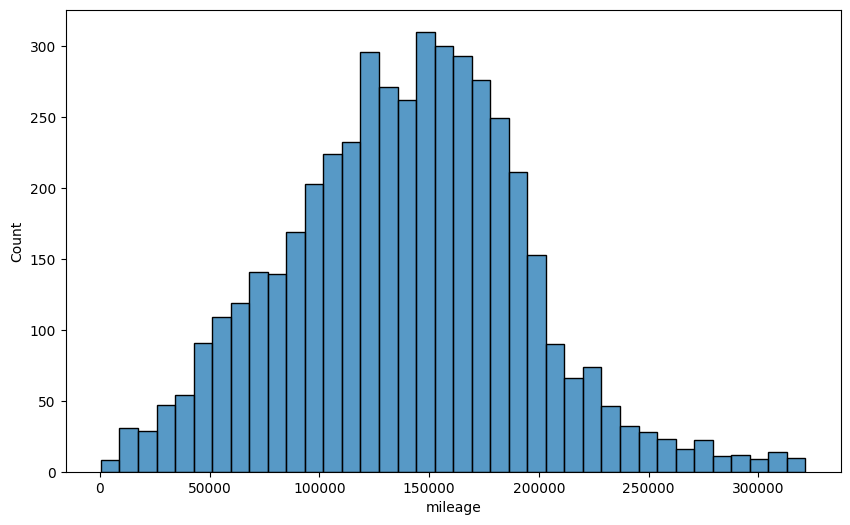

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(pricing_df_clean['mileage'])
plt.show()

A lot of cars are far from new, but only few have more than 200.000 kms (I am assuming kilometers since we're in Europe...) and most seem to get retired at this point .

### 3-DELAY

In [69]:
delay_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


Unfortunately, we don't have a direct correspondance between the 2 datasets ; a shared key such as car_id would be useful.

In [70]:
delay_df.isna().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [71]:
with pd.option_context('display.max_colwidth', None):
  display(doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


In [72]:
checkout = []
for x in delay_df['delay_at_checkout_in_minutes']:
    if x < 0:
        checkout.append('Early')
    elif x < 15:
        checkout.append('Late 0-15')
    elif x < 30:
        checkout.append('Late 15-30')
    elif x < 60:
        checkout.append('Late 30-60')
    elif x < 120 :
        checkout.append('Late 60-120')
    elif x >= 120 :
        checkout.append('Very late')        
    else:
        checkout.append('NA')

delay_df['checkout'] = checkout
display(delay_df['checkout'].value_counts())

checkout
Early          6820
NA             4964
Very late      2568
Late 0-15      2003
Late 60-120    1860
Late 30-60     1722
Late 15-30     1373
Name: count, dtype: int64

In [73]:
# Add another column next_rental with boolean values 
delay_df['next_rental'] = [True if x > 0 else False for x in delay_df.previous_ended_rental_id]

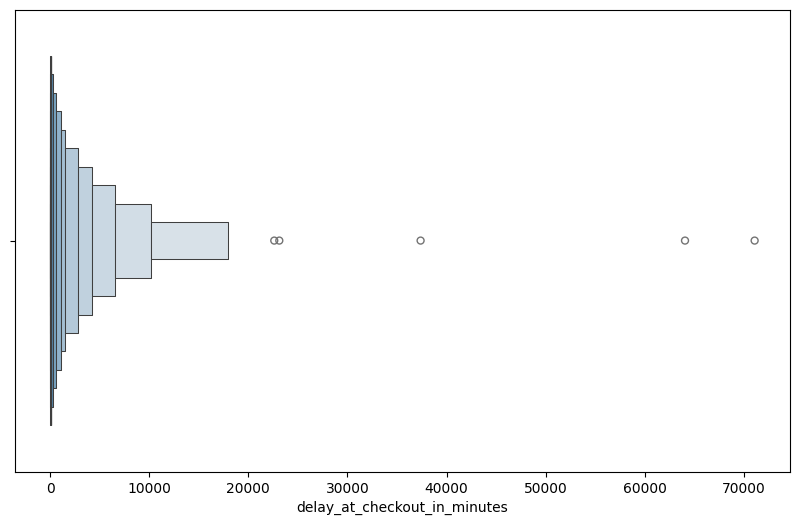

In [77]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,6))
mask_delay = delay_df[delay_df['checkout']!='Early'] # all earlier rentals 
sns.boxenplot(data=mask_delay, x='delay_at_checkout_in_minutes', scale='linear')
plt.show()

We observe a few outliers

In [78]:
delays = []
for x in delay_df['delay_at_checkout_in_minutes']:
    if x < delay_df['delay_at_checkout_in_minutes'].quantile(0.01):
        delays.append(np.nan)
    elif x > delay_df['delay_at_checkout_in_minutes'].quantile(0.99):
        delays.append(np.nan)     
    else:
        delays.append(x)

delay_df['delays_checkout_min_cleaned'] = delays

In [50]:
delay_df.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout,next_rental,delays_checkout_min_cleaned
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000,21310,21310,16019.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,7,2,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN,Early,False,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN,6820,19469,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430,NaN,NaN,31.599600
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486,NaN,NaN,215.203776
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000,NaN,NaN,-853.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000,NaN,NaN,-35.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000,NaN,NaN,9.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000,NaN,NaN,65.000000


In [79]:
# Save the two dataFrame
delay_df = pd.read_csv('api/delay_df.csv')
pricing_df_clean = pd.read_csv('api/pricing_df.csv')

In [80]:
delay_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout,next_rental,delays_checkout_min_cleaned
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN,False,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early,False,-81.0
2,508131,359049,connect,ended,70.0,NaN,NaN,Late 60-120,False,70.0
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN,False,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN,False,NaN


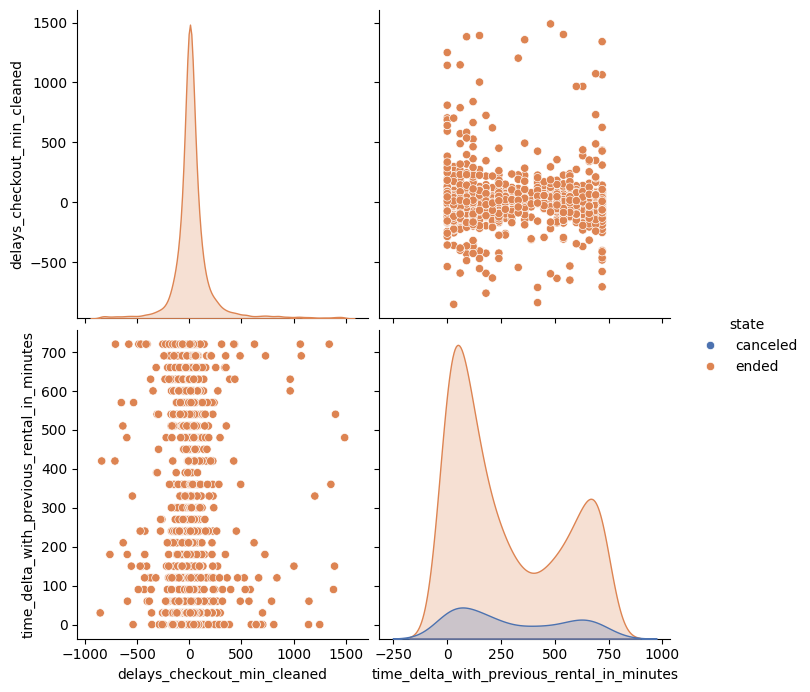

In [87]:
pairplot_df = delay_df[['state','delays_checkout_min_cleaned','time_delta_with_previous_rental_in_minutes']]
sns.pairplot(data=pairplot_df,hue='state',palette='deep',height=3.5, )
plt.show()

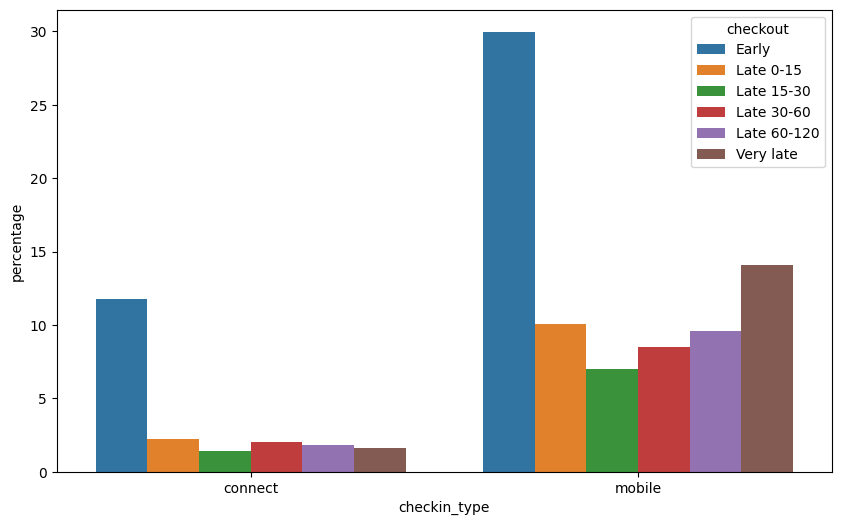

In [88]:
checkout_clean = delay_df.dropna(subset=['delay_at_checkout_in_minutes'])
checktype_checkout = checkout_clean.groupby(['checkin_type','checkout']).size().reset_index(name='count')
checktype_checkout['percentage'] = [i / checktype_checkout['count'].sum() * 100 for i in checktype_checkout['count']]

plt.figure(figsize=(10,6))
sns.barplot(y=checktype_checkout['percentage'],x=checktype_checkout['checkin_type'], hue=checktype_checkout['checkout'],orient='vertical')
plt.show()

In [89]:
delay_df.checkout.value_counts()/delay_df.checkout.count()*100

checkout
Early          41.722746
Very late      15.710266
Late 0-15      12.253762
Late 60-120    11.378931
Late 30-60     10.534687
Late 15-30      8.399608
Name: count, dtype: float64

Most late checkouts are still within the next 2 hours, so we can reasonably hope to significantly reduce risk by setting a threshold.<br>

Mobile check in type is more frequent, but otherwise the distribution is fairly close despite a little more NA's. 

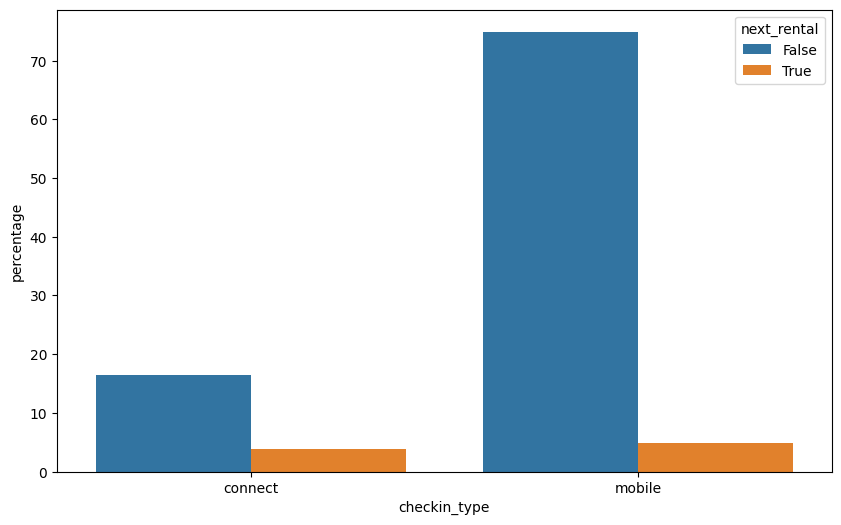

In [90]:
has_next = delay_df.groupby(['checkin_type','next_rental']).size().reset_index(name='count')
has_next['percentage'] = [i / has_next['count'].sum() * 100 for i in has_next['count']]

plt.figure(figsize=(10,6))
sns.barplot(y=has_next['percentage'],x=has_next['checkin_type'], hue=has_next['next_rental'],orient='vertical')
plt.show()

In [91]:
connect_share = (delay_df['checkin_type'].value_counts()/delay_df['checkin_type'].count()*100)[1]
mobile_share = (delay_df['checkin_type'].value_counts()/delay_df['checkin_type'].count()*100)[0]
connect_canceled = (delay_df[delay_df['state']=='canceled']['checkin_type'].value_counts()/delay_df[delay_df['state']=='canceled']['checkin_type'].count()*100)[1]

print(f"Mobile use is prevalent with a {round(mobile_share,2)}% share and Connect has a {round(connect_share,2)}% share. However, {round(connect_canceled)}% of cancellations are with Connect, \
suggesting a bigger impact from cancellations on this type of rental flow.")

Mobile use is prevalent with a 79.79% share and Connect has a 20.21% share. However, 24% of cancellations are with Connect, suggesting a bigger impact from cancellations on this type of rental flow.


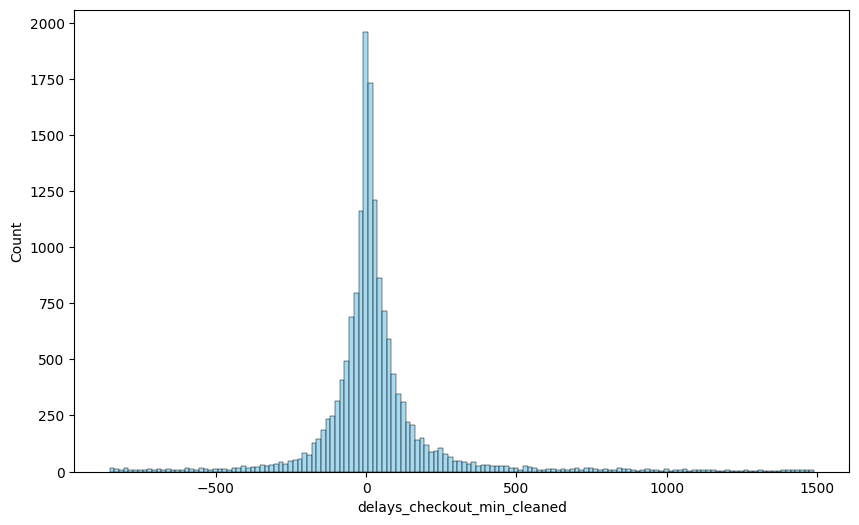

In [99]:
plt.figure(figsize=(10,6))
sns.histplot(data=delay_df,x='delays_checkout_min_cleaned',bins=150, color='skyblue', palette='viridis')
plt.show()

After eliminating the most extreme outliers, a substantial number of outliers still persist. It would be valuable to acquire data on rental durations, as the current information only indicates that rentals span from 'a few hours to a few days.

In [120]:
late_df = delay_df[delay_df['delays_checkout_min_cleaned']>0]

drivers_late = len(late_df)
drivers_total = len(delay_df)
percentage_drivers_late = drivers_late/drivers_total*100
percentage_drivers_late
print(f"On average, {round(percentage_drivers_late,2)} % of drivers are late")

On average, 43.36 % of drivers are late


In [101]:
time_late = late_df['delays_checkout_min_cleaned'].sum()/len(late_df)
print(f"On average, late drivers are {round(time_late,2)} minutes late")

On average, late drivers are 124.32 minutes late


#### Establishing a cutoff point.

If we implement a boundary between the checkout and the subsequent check-in, how many drivers would be impacted?

In [121]:
impacted_df = delay_df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
impacted_df['difference'] = impacted_df['time_delta_with_previous_rental_in_minutes'] - impacted_df['delays_checkout_min_cleaned']
issues = len(impacted_df[impacted_df['difference'] < 0])
issues_percentage = issues/len(delay_df)*100

In [122]:
print(f"{issues} of drivers ({round(issues_percentage,2)}%) have an issue with the time delta between rentals")

print(f"{len(impacted_df[impacted_df['difference'] < -30])} drivers causing an issue are more than 30 minutes late")

print(f"Implementing a 30 minutes delay would impact {len(impacted_df[impacted_df['time_delta_with_previous_rental_in_minutes'] < 30])} drivers")

257 of drivers (1.21%) have an issue with the time delta between rentals
178 drivers causing an issue are more than 30 minutes late
Implementing a 30 minutes delay would impact 279 drivers


In [124]:
60*12

720

In [129]:
threshold_range = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours
impacted_list_mobile = []
impacted_list_connect = []
impacted_list_total = []
solved_list_mobile = []
solved_list_connect = []
solved_list_total = []

solved_list = []
for t in threshold_range:
    impacted = impacted_df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
    connect_impact = impacted[impacted['checkin_type'] == 'connect']
    mobile_impact = impacted[impacted['checkin_type'] == 'mobile']
    connect_impact = connect_impact[connect_impact['time_delta_with_previous_rental_in_minutes'] < t]
    mobile_impact = mobile_impact[mobile_impact['time_delta_with_previous_rental_in_minutes'] < t]
    impacted = impacted[impacted['time_delta_with_previous_rental_in_minutes'] < t]
    impacted_list_connect.append(len(connect_impact))
    impacted_list_mobile.append(len(mobile_impact))
    impacted_list_total.append(len(impacted))

    solved = impacted_df[impacted_df['difference'] < 0]
    connect_solved = solved[solved['checkin_type'] == 'connect']
    mobile_solved = solved[solved['checkin_type'] == 'mobile']
    connect_solved = connect_solved[connect_solved['delay_at_checkout_in_minutes'] < t]
    mobile_solved = mobile_solved[mobile_solved['delay_at_checkout_in_minutes'] < t]
    solved = solved[solved['delay_at_checkout_in_minutes'] < t]
    solved_list_connect.append(len(connect_solved))
    solved_list_mobile.append(len(mobile_solved))
    solved_list_total.append(len(solved))

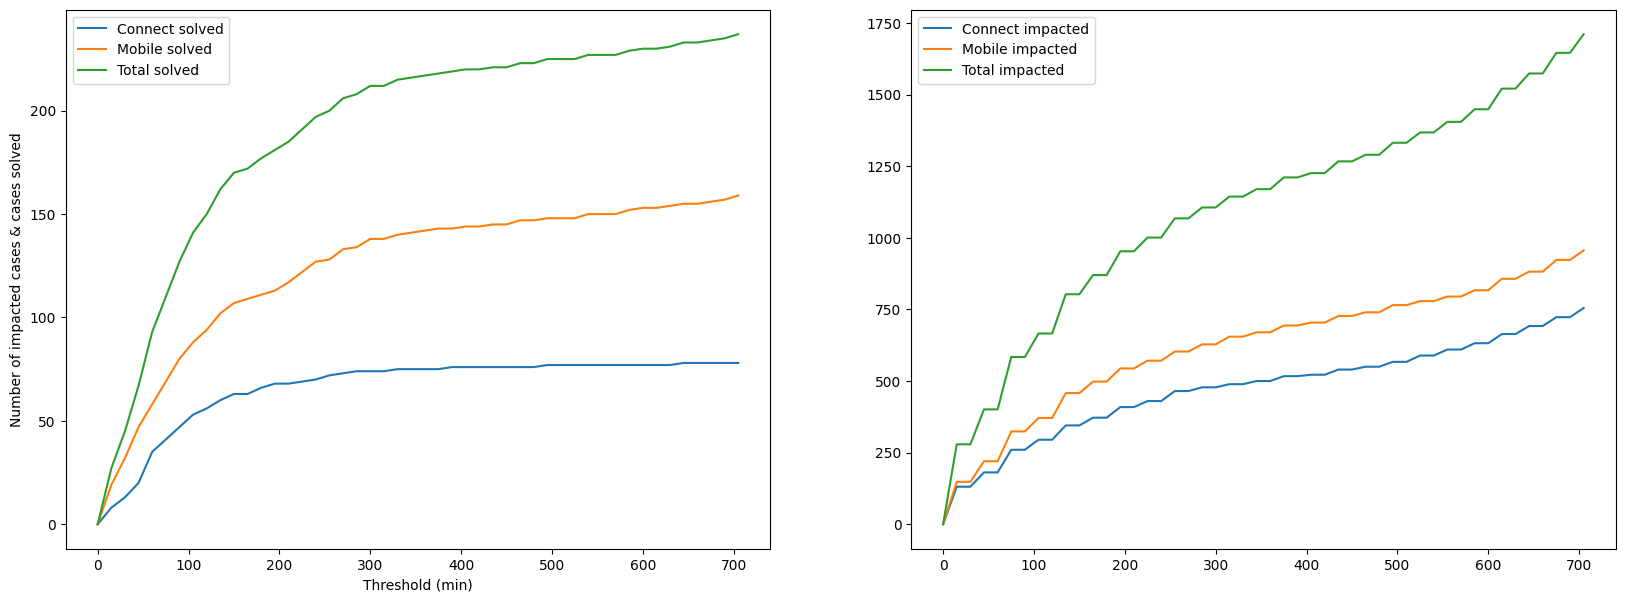

In [131]:

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,7))
ax[0].plot(threshold_range, solved_list_connect)
ax[0].plot(threshold_range, solved_list_mobile)
ax[0].plot(threshold_range, solved_list_total)
ax[1].plot(threshold_range, impacted_list_connect)
ax[1].plot(threshold_range, impacted_list_mobile)
ax[1].plot(threshold_range, impacted_list_total)
ax[0].set_xlabel('Threshold (min)')
ax[0].set_ylabel('Number of impacted cases & cases solved')
ax[0].legend(['Connect solved','Mobile solved','Total solved' ])
ax[1].legend(['Connect impacted','Mobile impacted','Total impacted' ])
plt.show()

*  We observe a similar pattern for both Connect and Mobile cases , although the plateau is reached a bit sooner for Connect 
   rentals.
 * Unfortunately, implementing the threshold could adversely affect a significant number of other rentals, preventing them from 
   occurring  as intended. This trade-off needs careful consideration against the potential positive impact on user experience.

* The analysis indicates that the rate of cases resolved begins to slow considerably after 120 minutes and even more so around 180 
  minutes (which forms a plateau, particularly for Connect cases).

* Based on this, our recommendation is to implement the threshold at 120 minutes, with an upper limit of 180 minutes in any case.

* While the overall effect appears to be most favorable when applied to both Connect and Mobile rentals, a prudent approach would be 
  to initially test it on Connect, given its smaller sample size. Additionally, the unique nature of Connect check-ins, characterized 
  by less human interaction, makes it an ideal starting point.

#### Deeper Examination: An alternative perspective

Considering the business aspect, let's approach this from a financial perspective. Ideally, we aim to enhance user experience, but since our data lacks user feedback, I'll focus on a critical aspect that is likely crucial for most stakeholders: financial impact.

* I want to emphasize that this analysis is a projection under the assumption of a sustained high demand for rentals.

* In this hypothetical scenario, let's examine:

     - The financial loss attributed to delays
     - Quantify the balance between risks and benefits
     - Reassess the optimal threshold that enhances this balance.

Since we have no information on how long a typical rental is and we have fairly high delays, I'll go with 1 day.

In [134]:
# selecting canceled rental
canceled = (delay_df['state'] == 'canceled').sum()
median_rental = pricing_df_clean['rental_price_per_day'].median() #median rental price is 119 dollars
canceled_loss = canceled*median_rental 

print(f"At the median rate and assuming an average of 24 hour rental, the {canceled} cancellations totaled a {canceled_loss} $ max loss")

At the median rate and assuming an average of 24 hour rental, the 3265 cancellations totaled a 388535.0 $ max loss


What is this "max loss" ? Not an absolute. It's more like money not made, really.

It relies on a few assumptions :
- First, that the user renting his car seeks to absolutely optimize revenue.
- Second, that all cancellations are due to delays.
- Third, that no money is made from the additional time fater the planned checkout time.
- Fourth, that users renting a car don't wait ; in case of a delay, they cancel outright.

In [135]:
number_delays = (delay_df['delays_checkout_min_cleaned'] > 0).sum()
sum_delays = delay_df[delay_df['delays_checkout_min_cleaned'] > 0]['delays_checkout_min_cleaned'].sum() # sum of delays superior to 0, in minutes
minute_rate = median_rental/1440 #1440 minutes in a day
late_revenue = sum_delays*minute_rate

print(f"Supposing a rate by the minute with no penalty for a late checkout, the {number_delays} late arrivals brought in {round(late_revenue,2)} $ (not counting outliers)")

Supposing a rate by the minute with no penalty for a late checkout, the 9240 late arrivals brought in 94925.39 $ (not counting outliers)


If late checkouts have to pay for the additional time at a rate by the minute, some of the "max loss" is mitigated.

In [136]:
late_loss = canceled_loss - late_revenue
print(f"If canceled rentals were for less than {round(late_revenue/canceled_loss*24,2)} hours, additional revenue from late checkouts and loss from canceled rentals break even.")
print(f"Or generates a {round(late_loss,2)} $ loss for a full day, still assuming all cancelled rentals were because of a late checkout.")

If canceled rentals were for less than 5.86 hours, additional revenue from late checkouts and loss from canceled rentals break even.
Or generates a 293609.61 $ loss for a full day, still assuming all cancelled rentals were because of a late checkout.


The "max loss" supposes a 24 hour average rental. If cancelled rentals were actually for smaller durations, there is much less impact.

In [137]:
threshold_range = np.arange(0, 60*24, step=15) # 15min intervals in a day
total_late_revenue = []
for i in threshold_range:
    late_revenue_growing = delay_df[delay_df['delays_checkout_min_cleaned'] > i]['delays_checkout_min_cleaned'].sum()*minute_rate
    total_late_revenue.append(late_revenue_growing)
total_late_revenue.reverse()

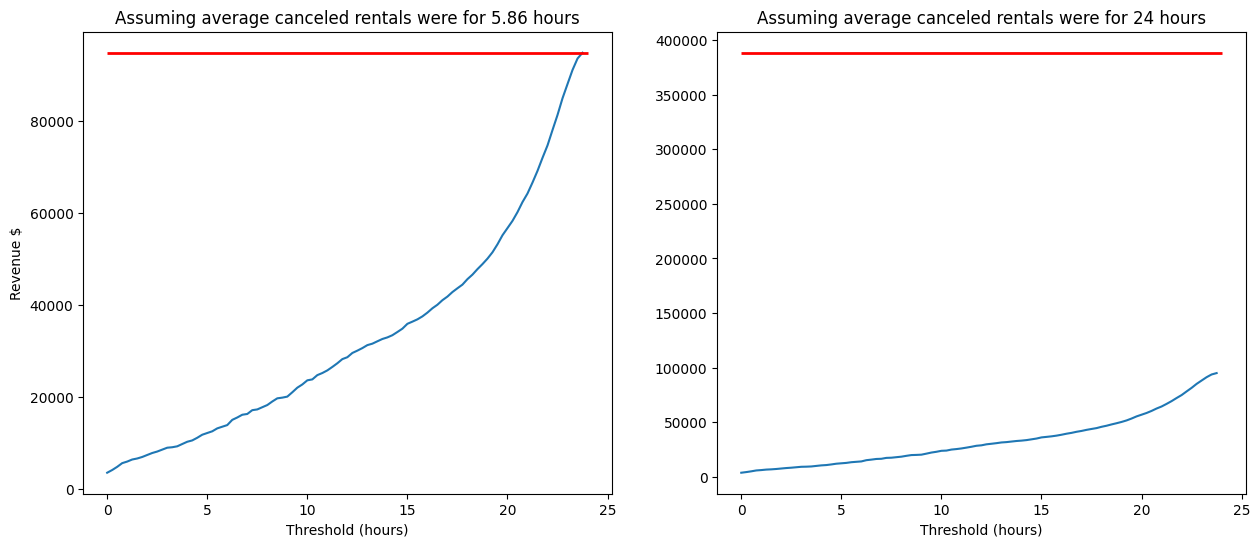

In [138]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,6))
ax[0].plot(threshold_range/60, total_late_revenue)
ax[0].hlines(y=canceled_loss/24*5.86, xmin=0, xmax=24, linewidth=2, color='r')
ax[0].set_title('Assuming average canceled rentals were for 5.86 hours')
ax[0].set_xlabel('Threshold (hours)')
ax[1].set_xlabel('Threshold (hours)')
ax[0].set_ylabel('Revenue $')
ax[1].plot(threshold_range/60, total_late_revenue)
ax[1].hlines(y=canceled_loss, xmin=0, xmax=24, linewidth=2, color='r')
ax[1].set_title('Assuming average canceled rentals were for 24 hours')
plt.show()

At this point we would really need more time data (duration of each ride, how much time a car spends unused, are there other cars available...) to accurately estimate losses.

We can calculate the "maximum risk" of late arrivals.
This is even more theoretical since it assumes:
- Every minute late results in a cancellation
- All rentals have a next one planned 
- All cancelled rentals would have been a 24 hour rental

In [139]:
at_risk = number_delays*minute_rate*1440
ended = (delay_df['state'] == 'ended').sum()
revenue = ended*median_rental + late_revenue
risk_over_revenue = round(at_risk/(revenue),2)

print(f"Late arrivals triggered a maximum risk of {at_risk} $, so about {risk_over_revenue} times the total estimated revenue from rentals of {round(revenue,2)} $")

Late arrivals triggered a maximum risk of 1099560.0 $, so about 0.49 times the total estimated revenue from rentals of 2242280.39 $


We can observe that neglecting this aspect could lead to severe repercussions in this scenario. While it's a hypothetical scenario, it sheds light on the considerable room for optimization!

However, it's crucial to note that we don't have definitive evidence that all cancellations are directly tied to late checkouts. Moreover, it's uncertain whether these cancellations are offset by reallocating cars to other rentals. Gathering more data on this issue, such as soliciting user feedback on cancellation reasons, would be valuable. This approach could help us pinpoint the cost of late arrivals and potentially uncover other user concerns with the rental service.

As we move forward to establish an acceptable threshold, it's also worth considering implementing penalties for late arrivals and exploring the option of increasing rental rates after the scheduled hour.

In [140]:
threshold_range = np.arange(60*24, step=15) 
penalty = 3  # penalty for late arrival is set at 3 times the normal minute rate
risk_over_revenue_penalty= []

for t in threshold_range:
    count = (delay_df['delays_checkout_min_cleaned'] > t).sum()
    late_revenue_penalty = delay_df[delay_df['delays_checkout_min_cleaned'] > t]['delays_checkout_min_cleaned'].sum() * minute_rate * penalty
    late_risk = count * median_rental
    risk_over_revenue_penalty.append(late_risk/late_revenue_penalty)

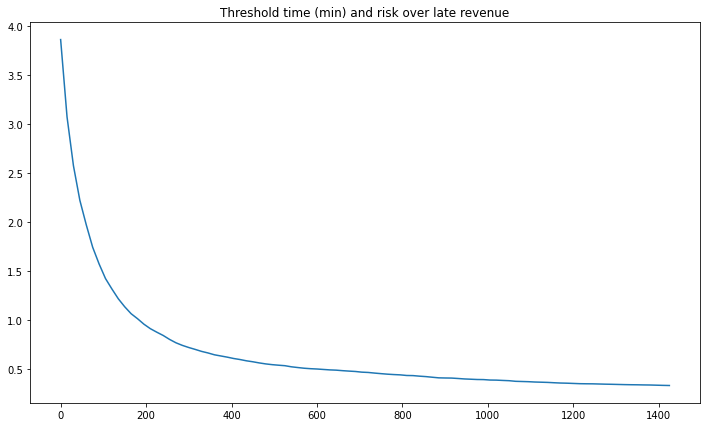

In [219]:
plt.figure(figsize=(12,7))
sns.lineplot(x=threshold_range,y=risk_over_revenue_penalty)
plt.title('Threshold time (min) and risk over late revenue')
plt.show()

For standard rentals of 1 day and a penalty of 3 times the normal minute rate after the rental is due, with our current data we would need to set a threshold of 180 minutes to mitigate losses from late checkouts.


**Additional remarks** :
A significant caveat is that all this, on top of some assumptions (duration of rental, maximum loss...), does not take into account actual demand in rentals. This has limited production applications and this should not be relied upon as neither a comprehensive projection of revenue nor a reliable way to alleviate user discomfort see assumptions for "max loss" and "max risk" above.

A reduced profit margin is not a perfectly accurate way to account for user discomfort and a new metric should be made, perhaps using the results of a poll to estimate the impact of delays on the user experience.

It should also be noted that in order to fully measure the potential negative or positive impact of implementing this new delay, we would need start and end times of all rentals.